<a href="https://colab.research.google.com/github/richardzefan/Employee-Absenteeism---HR-Department/blob/main/Human_Resources_Department.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Business Understanding



***Goals***
- Perusahaan The Look memiliki Karyawan sebanyak 8000++. Namun selama setahun terakhir tingkat produktivitas menurun. Untuk itu, HR ingin mengurangi rata-rata absensi staff perusahaan selama setahun maksimal 16 jam saja supaya dapat meningkatkan kontribusi , produktivitas, kedisiplinan staff perusahaan , serta meminimalisirkan kerugian  pada perusahaan



| 5W1H      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| WHAT           |Mengurangi waktu absensi staff perusahaan                                                                    |
| WHO         | Staff Perusahaan                                                                          |
| WHERE         |  The Look E-commerce                                                            |
| WHEN      | Data periode 2019 - 2022                                                                       |
| WHY     | Untuk meningkatkan kontribusi , produktifitas, kedisiplinan staff, serta meminimalisirkan kerugian pada perusahaan                                                                           |
| HOW     | Dengan menganalisis data rata-rata absensi staff serta menggunakan Logistic Regression                                                                          |

#Data Understanding

##Collect Initial Data




*   SOURCE 
  * Google Big Query: 
      * The Look Ecommerce => https://github.com/GoogleCloudPlatform/public-datasets-pipelines/blob/main/datasets/thelook_ecommerce/pipelines/_images/run_thelook_kub/fake.py 

  * Kaggle: 
      * Absenteeism Dataset  => https://www.kaggle.com/datasets/HRAnalyticRepository/absenteeism-dataset 







*   **DATA EMPLOYEES**

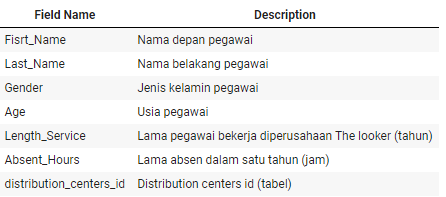



*   **DATA DISTRIBUTION CENTERS**

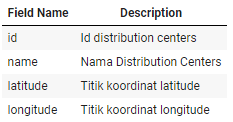



*   **DATA PRODUCTS**

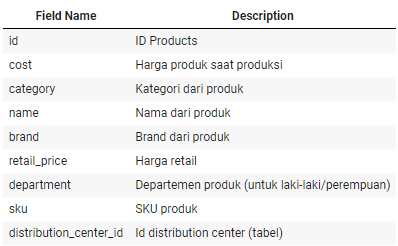

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# distribution_centers= pd.read_csv('/content/drive/MyDrive/SI @RUANGGURU-CAMP : DATA,BUSINESS ANALYTICS & OPERATIONS/6. FINAL PROJECT DBA/Dataset Final Project DBA/distribution_centers.csv')
# employees= pd.read_csv('/content/drive/MyDrive/SI @RUANGGURU-CAMP : DATA,BUSINESS ANALYTICS & OPERATIONS/6. FINAL PROJECT DBA/Dataset Final Project DBA/employees.csv')
# events= pd.read_csv('/content/drive/MyDrive/SI @RUANGGURU-CAMP : DATA,BUSINESS ANALYTICS & OPERATIONS/6. FINAL PROJECT DBA/Dataset Final Project DBA/events.csv')
# inventory= pd.read_csv('/content/drive/MyDrive/SI @RUANGGURU-CAMP : DATA,BUSINESS ANALYTICS & OPERATIONS/6. FINAL PROJECT DBA/Dataset Final Project DBA/inventory_items.csv')
# order_item= pd.read_csv('/content/drive/MyDrive/SI @RUANGGURU-CAMP : DATA,BUSINESS ANALYTICS & OPERATIONS/6. FINAL PROJECT DBA/Dataset Final Project DBA/order_items.csv')
# orders= pd.read_csv('/content/drive/MyDrive/SI @RUANGGURU-CAMP : DATA,BUSINESS ANALYTICS & OPERATIONS/6. FINAL PROJECT DBA/Dataset Final Project DBA/orders.csv')
# products= pd.read_csv('/content/drive/MyDrive/SI @RUANGGURU-CAMP : DATA,BUSINESS ANALYTICS & OPERATIONS/6. FINAL PROJECT DBA/Dataset Final Project DBA/products.csv')
# users= pd.read_csv('/content/drive/MyDrive/SI @RUANGGURU-CAMP : DATA,BUSINESS ANALYTICS & OPERATIONS/6. FINAL PROJECT DBA/Dataset Final Project DBA/users.csv')

In [ ]:
#IMPORT DATA hasil join With SQL
df = pd.read_csv('/content/drive/MyDrive/SI @RUANGGURU-CAMP : DATA,BUSINESS ANALYTICS & OPERATIONS/6. FINAL PROJECT DBA/FINAL PROJECT - KELOMPOK 78/HR-DEPARTMENT-FILES/Join_Table.csv')

##Describe Data

In [ ]:
#melihat 5 data pertama
df.head()

,nama_lengkap,gender,age,length_service,absent_hour,distribution_centers_id,distribution_centers_name,latitude,longitude,jumlah_produk
0,Abbate Laurie,F,39.891883,1.766600,51.527000,1,Memphis TN,35.1174,-89.9711,3891
1,Abbott Edward,M,54.248067,3.159911,131.783628,1,Memphis TN,35.1174,-89.9711,3891
2,Abbott George,M,38.109774,6.466156,0.000000,1,Memphis TN,35.1174,-89.9711,3891
3,Abbott Monroe,M,62.250491,4.210838,163.868202,1,Memphis TN,35.1174,-89.9711,3891
4,Adamek Adam,M,51.092510,0.330491,113.717929,1,Memphis TN,35.1174,-89.9711,3891


In [ ]:
#melihat 5 data terakhir
df.tail()

,nama_lengkap,gender,age,length_service,absent_hour,distribution_centers_id,distribution_centers_name,latitude,longitude,jumlah_produk
8331,Young Dale,M,31.306072,4.114723,13.841373,10,Savannah GA,32.0167,-81.1167,1881
8332,Young Judith,F,39.749116,4.391028,62.639122,10,Savannah GA,32.0167,-81.1167,1881
8333,Zajicek Mary,F,42.287443,4.891073,72.706024,10,Savannah GA,32.0167,-81.1167,1881
8334,Zamora Stanley,M,44.789064,7.108866,63.694934,10,Savannah GA,32.0167,-81.1167,1881
8335,Zeigler Jesus,M,51.234806,4.503569,89.865888,10,Savannah GA,32.0167,-81.1167,1881


In [ ]:
#employees data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8336 entries, 0 to 8335
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   nama_lengkap               8336 non-null   object 
 1   gender                     8336 non-null   object 
 2   age                        8336 non-null   float64
 3   length_service             8336 non-null   float64
 4   absent_hour                8336 non-null   float64
 5   distribution_centers_id    8336 non-null   int64  
 6   distribution_centers_name  8336 non-null   object 
 7   latitude                   8336 non-null   float64
 8   longitude                  8336 non-null   float64
 9   jumlah_produk              8336 non-null   int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 651.4+ KB


Ada sebanyak 8336 Baris dan 10 kolom pada Data

##Explore Data

In [ ]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# summary_statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,8336.0,42.007086,9.939798,3.504743,35.298748,42.114924,48.666943,77.938003
length_service,8336.0,4.782910,2.462990,0.012098,3.575892,4.600248,5.623922,43.735239
absent_hour,8336.0,61.283978,49.038365,0.000000,19.127590,56.005808,94.284692,272.530123
distribution_centers_id,8336.0,5.493762,2.872447,1.000000,3.000000,5.000000,8.000000,10.000000
latitude,8336.0,34.667625,4.334152,29.760400,30.694400,32.783300,39.950000,41.836900
longitude,8336.0,-87.987046,12.073775,-118.250000,-90.066700,-88.043100,-79.933300,-73.783400
jumlah_produk,8336.0,2915.999640,669.356455,1881.000000,2572.000000,2761.000000,3667.000000,3929.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


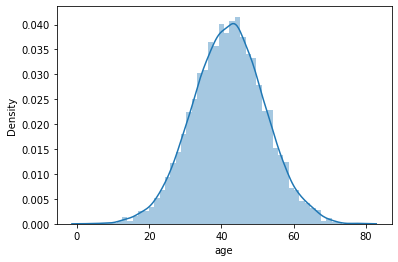

In [ ]:
# Distribusi Age
sns.distplot(df.age)

- Pada data age dapat dikatakan distribusinya normal. namun harus dipastikan lagi dengan mengecek outlier nanti

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


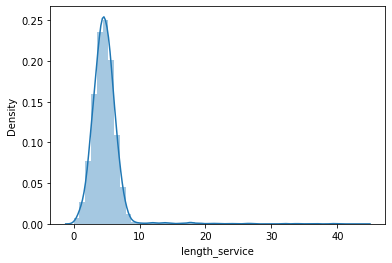

In [ ]:
# Distribusi Waktu lamanya bekerja (Tahun)
sns.distplot(df.length_service)

- Pada data length_service terlihat bahwa distribusinya tidak normal. terdapat cukup banyak outlier pada angka 10-40

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


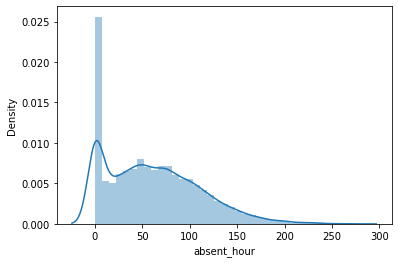

In [ ]:
# Distribusi Absen
sns.distplot(df.absent_hour)

- Data Absen_hour juga terdapat outlier. untuk lebih lengkapnya kita akan mengecek dan menghandle outlier nanti

##Verify Data Quality

###Check Duplikat Data

In [ ]:
# check duplicate row
df[df.duplicated(keep=False)]

,nama_lengkap,gender,age,length_service,absent_hour,distribution_centers_id,distribution_centers_name,latitude,longitude,jumlah_produk


- Pada data ini tidak ada duplikat data(row)

In [ ]:
df.duplicated().sum()

0

###Finding Outlier

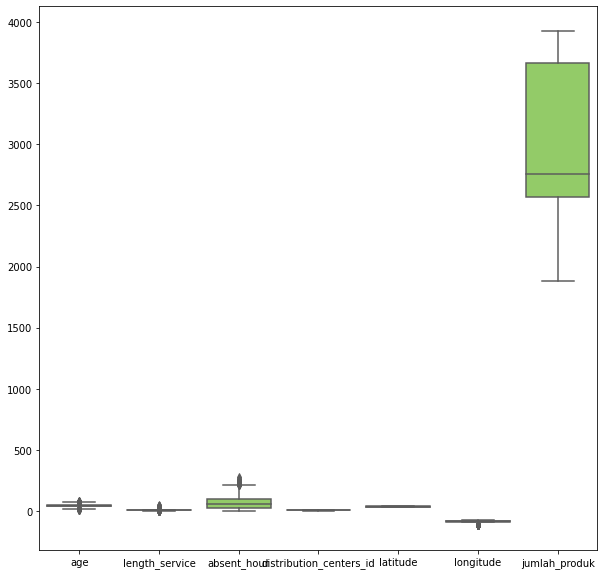

In [ ]:
#check outliers - v1
fig, ax = plt.subplots(figsize=(10,10)) #buat frame/figure
sns.boxplot(data=df, palette=('#db5f57', '#dbc257', '#91db57', '#57d3db'))

- dapat dilihat terdapat outlier pada kolom age,length_service, dan absent_hour
- untuk lebih jelasnya kita pisahkan data yang tidak dibutuhkan

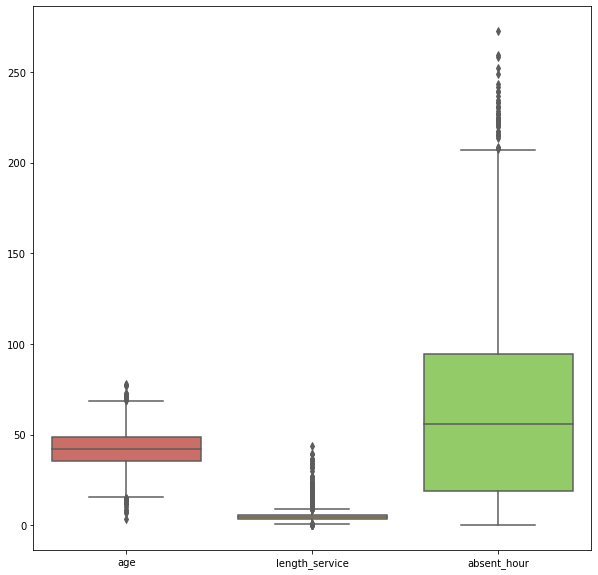

In [ ]:
#check outliers kolom 'age','length_service',dan 'absent_hour'
fig, ax = plt.subplots(figsize=(10,10)) #buat frame/figure
sns.boxplot(data=df[['age','length_service','absent_hour']], palette=('#db5f57', '#dbc257', '#91db57', '#57d3db'))

- dapat dilihat outlier pada 3 kolom tersebut cukup banyak

In [ ]:
#Mencari Nilai Batas (pada distribusi normal)

print("Highest allowed : \n",df[['age','length_service','absent_hour']].mean() + 3*df[['age','length_service','absent_hour']].std())
print("Lowest allowed : \n",df[['age','length_service','absent_hour']].mean() - 3*df[['age','length_service','absent_hour']].std())

Highest allowed : 
 age                71.826479
length_service     12.171878
absent_hour       208.399071
dtype: float64
Lowest allowed : 
 age               12.187692
length_service    -2.606059
absent_hour      -85.831116
dtype: float64


NOTE : 
* Untuk metode deteksi outlier ini, mean dan standar deviasi dari residual dihitung dan dibandingkan. Jika suatu nilai adalah sejumlah standar deviasi tertentu dari rata-rata, titik data tersebut diidentifikasi sebagai outlier. Jumlah standar deviasi yang ditentukan disebut ambang batas. Nilai defaultnya adalah 3.

* Metode ini dapat gagal mendeteksi outlier karena outlier meningkatkan standar deviasi. Semakin ekstrim outlier, semakin besar standar deviasi terpengaruh.

* Source : https://docs.oracle.com/cd/E40248_01/epm.1112/cb_statistical/frameset.htm?ch07s02s10s01.html

In [ ]:
#menampilkan nilai dari kolom age yang dideteksi sebagai outlier
df[(df['age'] > 71.34) | (df['age'] < 11.65)]

,nama_lengkap,gender,age,length_service,absent_hour,distribution_centers_id,distribution_centers_name,latitude,longitude,jumlah_produk
240,Fleury Susanna,F,72.075898,2.708078,215.694986,1,Memphis TN,35.1174,-89.9711,3891
1535,Smith Filomena,F,6.634917,3.290380,0.000000,2,Chicago IL,41.8369,-87.6847,3929
2198,Moore Tamara,F,8.648462,5.454766,0.000000,3,Houston TX,29.7604,-95.3698,3667
2962,Lynam Dorothy,F,7.199909,6.816121,0.000000,4,Los Angeles CA,34.0500,-118.2500,2761
3006,Miles Josefina,F,9.833236,5.903520,0.000000,4,Los Angeles CA,34.0500,-118.2500,2761
3148,Robinson Carmen,F,72.841775,5.814468,189.948165,4,Los Angeles CA,34.0500,-118.2500,2761
3705,Higbee Connie,F,72.376830,3.657865,198.723435,5,New Orleans LA,29.9500,-90.0667,2112
3765,Kaiser Noreen,F,11.475107,6.588401,0.000000,5,New Orleans LA,29.9500,-90.0667,2112
4046,Stearns Gary,M,8.115934,0.527552,0.000000,5,New Orleans LA,29.9500,-90.0667,2112
4158,Wilson Marci,F,3.504743,4.678731,0.000000,5,New Orleans LA,29.9500,-90.0667,2112


In [ ]:
#menghitung jumlah outlier pada kolom age
df[(df['age'] > 71.34) | (df['age'] < 11.65)].count()

nama_lengkap                 16
gender                       16
age                          16
length_service               16
absent_hour                  16
distribution_centers_id      16
distribution_centers_name    16
latitude                     16
longitude                    16
jumlah_produk                16
dtype: int64

Ada 19 Row yang dideteksi sebagai outlier dari total 8336 baris pada tabel

In [ ]:
#menampilkan nilai dari kolom length_service yang dideteksi sebagai outlier
df[(df['length_service'] > 12.17) | (df['length_service'] < -2.60)]

,nama_lengkap,gender,age,length_service,absent_hour,distribution_centers_id,distribution_centers_name,latitude,longitude,jumlah_produk
20,Archer Renee,F,39.147491,21.147491,88.627496,1,Memphis TN,35.1174,-89.9711,3891
46,Baum Stephanie,F,45.559400,14.410268,69.478210,1,Memphis TN,35.1174,-89.9711,3891
80,Bryan Larry,M,45.012630,12.688114,47.511210,1,Memphis TN,35.1174,-89.9711,3891
89,Busch Alice,F,35.493900,13.707758,0.000000,1,Memphis TN,35.1174,-89.9711,3891
108,Carpentier William,M,53.721680,12.259574,0.000000,1,Memphis TN,35.1174,-89.9711,3891
...,...,...,...,...,...,...,...,...,...,...
7654,Clark Ozella,F,41.581730,17.692410,52.098354,10,Savannah GA,32.0167,-81.1167,1881
7794,Gomez Irene,F,39.232640,13.412318,0.000000,10,Savannah GA,32.0167,-81.1167,1881
7895,Johnson Paul,M,36.480086,18.480086,37.115712,10,Savannah GA,32.0167,-81.1167,1881
8225,Tandy Genoveva,F,37.656330,17.692462,75.158456,10,Savannah GA,32.0167,-81.1167,1881


In [ ]:
#menghitung jumlah outlier pada kolom length service
df[(df['length_service'] > 12.17) | (df['length_service'] < -2.60)].count()

nama_lengkap                 100
gender                       100
age                          100
length_service               100
absent_hour                  100
distribution_centers_id      100
distribution_centers_name    100
latitude                     100
longitude                    100
jumlah_produk                100
dtype: int64

Ada 100 Row yang dideteksi sebagai outlier dari total 8336 baris pada tabel

In [ ]:
#menampilkan nilai dari kolom absent_row yang dideteksi sebagai outlier
df[(df['absent_hour'] > 208.399071) | (df['absent_hour'] < -85.83)]

,nama_lengkap,gender,age,length_service,absent_hour,distribution_centers_id,distribution_centers_name,latitude,longitude,jumlah_produk
240,Fleury Susanna,F,72.075898,2.708078,215.694986,1,Memphis TN,35.1174,-89.9711,3891
270,Glenn Jillian,F,65.431170,1.637244,224.351575,1,Memphis TN,35.1174,-89.9711,3891
295,Groves Martha,F,69.333303,4.564354,220.594185,1,Memphis TN,35.1174,-89.9711,3891
397,Jones Elia,F,65.759349,5.384517,233.102158,1,Memphis TN,35.1174,-89.9711,3891
629,Rieke Melinda,F,66.338983,5.464500,226.921085,1,Memphis TN,35.1174,-89.9711,3891
704,Springer James,M,69.971426,3.629952,224.426736,1,Memphis TN,35.1174,-89.9711,3891
724,Sullivan Cynthia,F,65.368374,3.033414,223.350398,1,Memphis TN,35.1174,-89.9711,3891
874,Bailey Helen,F,62.653182,2.703653,228.565495,2,Chicago IL,41.8369,-87.6847,3929
1372,Nelson Latonya,F,67.262249,3.377847,219.561445,2,Chicago IL,41.8369,-87.6847,3929
1506,Schmaltz Peggy,F,62.746425,5.326187,249.055872,2,Chicago IL,41.8369,-87.6847,3929


In [ ]:
df[(df['absent_hour'] > 208.399071) | (df['absent_hour'] < -85.83)].count()

nama_lengkap                 42
gender                       42
age                          42
length_service               42
absent_hour                  42
distribution_centers_id      42
distribution_centers_name    42
latitude                     42
longitude                    42
jumlah_produk                42
dtype: int64

Ada 42 Row yang dideteksi sebagai outlier dari total 8336 baris pada tabel

###Check Missing and Unique Value

In [ ]:
# check missing data
df.isnull().sum()

nama_lengkap                 0
gender                       0
age                          0
length_service               0
absent_hour                  0
distribution_centers_id      0
distribution_centers_name    0
latitude                     0
longitude                    0
jumlah_produk                0
dtype: int64

- tidak ada data yang missing (misisng value)

In [ ]:
# check number of unique value
df.nunique()

nama_lengkap                 8209
gender                          2
age                          8298
length_service               8301
absent_hour                  7016
distribution_centers_id        10
distribution_centers_name      10
latitude                       10
longitude                      10
jumlah_produk                  10
dtype: int64

In [ ]:
# check unique value
for feature in df.columns:
  print('------ ' + feature + ' ------')
  try:
    print(np.sort(df[feature].unique()))
  except:
    print(df[feature].unique())
  print()

------ nama_lengkap ------
['Aaron Michael' 'Abadie Tanya' 'Abbas Eileen' ... 'Zorn Flavia'
 'Zuniga William' 'Zwilling Claire']

------ gender ------
['F' 'M']

------ age ------
[ 3.5047425   6.63491714  7.199909   ... 77.         77.2380983
 77.93800302]

------ length_service ------
[1.2097544e-02 5.3278544e-02 8.5149041e-02 ... 3.9335691e+01 3.9447349e+01
 4.3735239e+01]

------ absent_hour ------
[0.00000000e+00 9.68043500e-03 1.59846180e-02 ... 2.57924958e+02
 2.59532225e+02 2.72530123e+02]

------ distribution_centers_id ------
[ 1  2  3  4  5  6  7  8  9 10]

------ distribution_centers_name ------
['Charleston SC' 'Chicago IL' 'Houston TX' 'Los Angeles CA' 'Memphis TN'
 'Mobile AL' 'New Orleans LA' 'Philadelphia PA'
 'Port Authority of New York/New Jersey NY/NJ' 'Savannah GA']

------ latitude ------
[29.7604 29.95   30.6944 32.0167 32.7833 34.05   35.1174 39.95   40.634
 41.8369]

------ longitude ------
[-118.25    -95.3698  -90.0667  -89.9711  -88.0431  -87.6847  -81.1167


- unik value pada setiap tabel

#Data Preparation

##Data Cleaning

###Outlier Removal (IQR Method)

In [ ]:
import warnings
warnings.filterwarnings("ignore")
features =  ['length_service','age','absent_hour']

In [ ]:
#Capping using IQR method
df_new = df.copy()

In [ ]:
def iqr_capping(df, cols, factor):
    
    for col in cols:
        
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        
        iqr = q3 - q1
        
        upper_whisker = q3 + (factor*iqr)
        lower_whisker = q1 - (factor*iqr)
        
        df[col] = np.where(df[col]>upper_whisker, upper_whisker,
                 np.where(df[col]<lower_whisker, lower_whisker, df[col]))

In [ ]:
iqr_capping(df_new, features, 1.5)

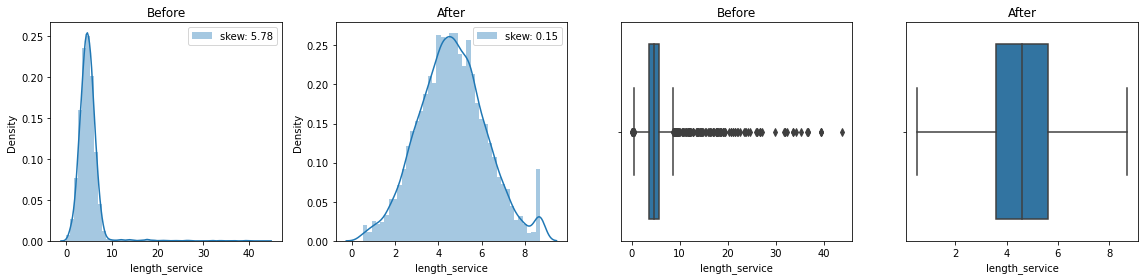

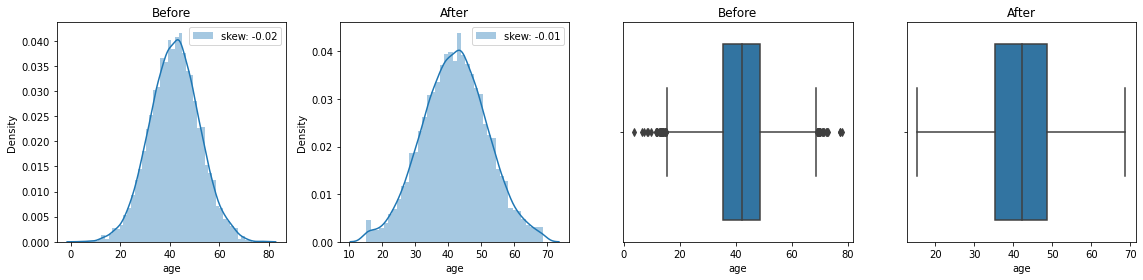

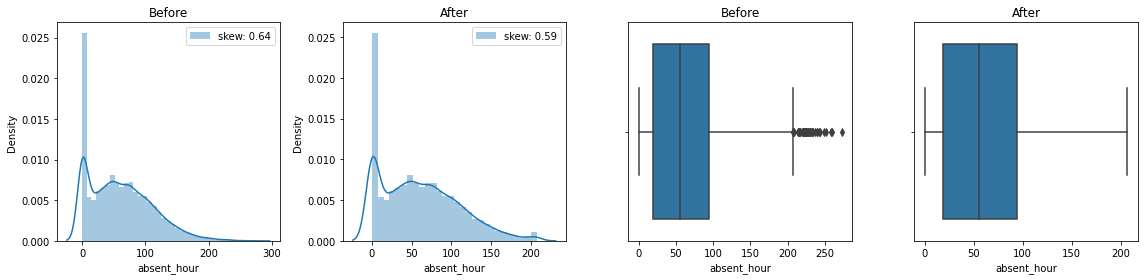

In [ ]:
for col in features:
    plt.figure(figsize=(16,4))
    
    plt.subplot(141)
    sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.title('Before')
    plt.legend()
    
    plt.subplot(142)
    sns.distplot(df_new[col], label="skew: " + str(np.round(df_new[col].skew(),2)))
    plt.title('After')
    plt.legend()
    
    plt.subplot(143)
    sns.boxplot(df[col])
    plt.title('Before')
    
    plt.subplot(144)
    sns.boxplot(df_new[col])
    plt.title('After')
    plt.tight_layout()
    plt.show()

- Outlier telah dihapus namun dapat dilihat pada kolom absent_hour distribusinya belum

In [ ]:
df1 = df_new.copy()

##EDA and Visualization

### Rata-rata (agg)

In [ ]:
#Rata-rata usia staff
df_new['age'].mean()

42.01186858710293

In [ ]:
#Rata-rata masa kerja staff
df_new['length_service'].mean()

4.6324985855671175

In [ ]:
#rata-rata jam absensi staff
df_new['absent_hour'].mean()

61.17108235028599

### Absent Rate

**_Menghitung Absent Rate_**

Jika :
karyawan bekerja  40 jam seminggu (8 jam sehari, 5 hari seminggu) dan  23 hari libur per tahun.

* 1 Tahun = 53 Minggu
* Maka = 40 jam per minggu X 53 Minggu = Total seorang karyawan/staff penuh waktu bekerja selama **2.080 jam per tahun**

Ref : 
* https://www.theaccessgroup.com/media/8327/the-impact-of-unmanaged-absence-on-billability-and-profitability_2017.pdf 
* https://www.indeed.com/perusahaan/hourly-to-salary-calculator-for-employers#:~:text=Based%20on%20a%20standard%20work,x%2052%20weeks%20a%20year).


In [ ]:
#Asumsi 8 jam kerja dengan 5 hari dalam seminggu
df_new['Absen_rate'] = (df_new['absent_hour']/2080*100)

In [ ]:
df_new.head(5)

,nama_lengkap,gender,age,length_service,absent_hour,distribution_centers_id,distribution_centers_name,latitude,longitude,jumlah_produk,Absen_rate
0,Abbate Laurie,F,39.891883,1.766600,51.527000,1,Memphis TN,35.1174,-89.9711,3891,2.477260
1,Abbott Edward,M,54.248067,3.159911,131.783628,1,Memphis TN,35.1174,-89.9711,3891,6.335751
2,Abbott George,M,38.109774,6.466156,0.000000,1,Memphis TN,35.1174,-89.9711,3891,0.000000
3,Abbott Monroe,M,62.250491,4.210838,163.868202,1,Memphis TN,35.1174,-89.9711,3891,7.878279
4,Adamek Adam,M,51.092510,0.503847,113.717929,1,Memphis TN,35.1174,-89.9711,3891,5.467208


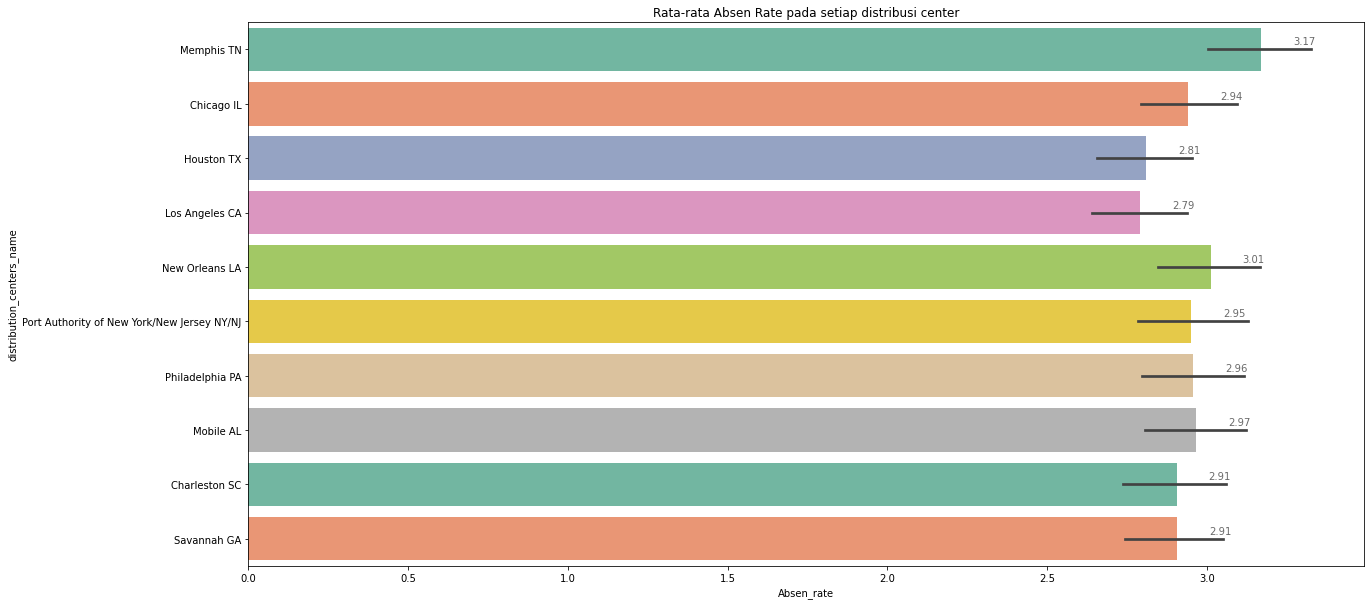

In [ ]:
#Rata-rata Absen rate pada setiap distribusi center
plt.figure(figsize = (20,10))
ax = sns.barplot(x=df_new['Absen_rate'],y = df_new['distribution_centers_name'],
                palette='Set2')
plt.title('Rata-rata Absen Rate pada setiap distribusi center')
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.1, i.get_y()+.31, \
            str(round((i.get_width()), 2)), fontsize=10, color='dimgrey')
plt.show()



- Rata-rata absent rate tertinggi yaitu pada staff2 yang bertempat di Memphis TN distribution center
- Rata-rata absent rate terendah yaitu pada staff2 yang bertempat di los angeles CA. dapat dikatakan bahwa staff ditempat ini cenderung lebih rajin dibandingkan staff-staff di tempat lain

### Gender

In [ ]:
df_new['gender'].value_counts()

M    4216
F    4120
Name: gender, dtype: int64

- Total staff berjenis kelamin laki-laki sebanyak = 4216 orang
- dan Perempuan sebanyak = 4120 orang

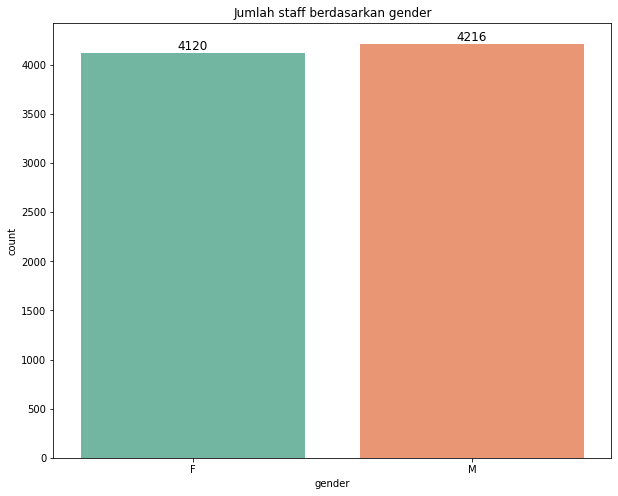

In [ ]:
#Jumlah staff berdasarkan gender pada setiap distribusi center
plt.figure(figsize = (10,8))
ax = sns.countplot(x = df_new['gender'], palette='Set2')
plt.title('Jumlah staff berdasarkan gender')
# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()


- Pada perusahaan the look staff yang berjenis kelamin laki-laki lebih banyak dibandingkan yang berjenis kelamin perempuan

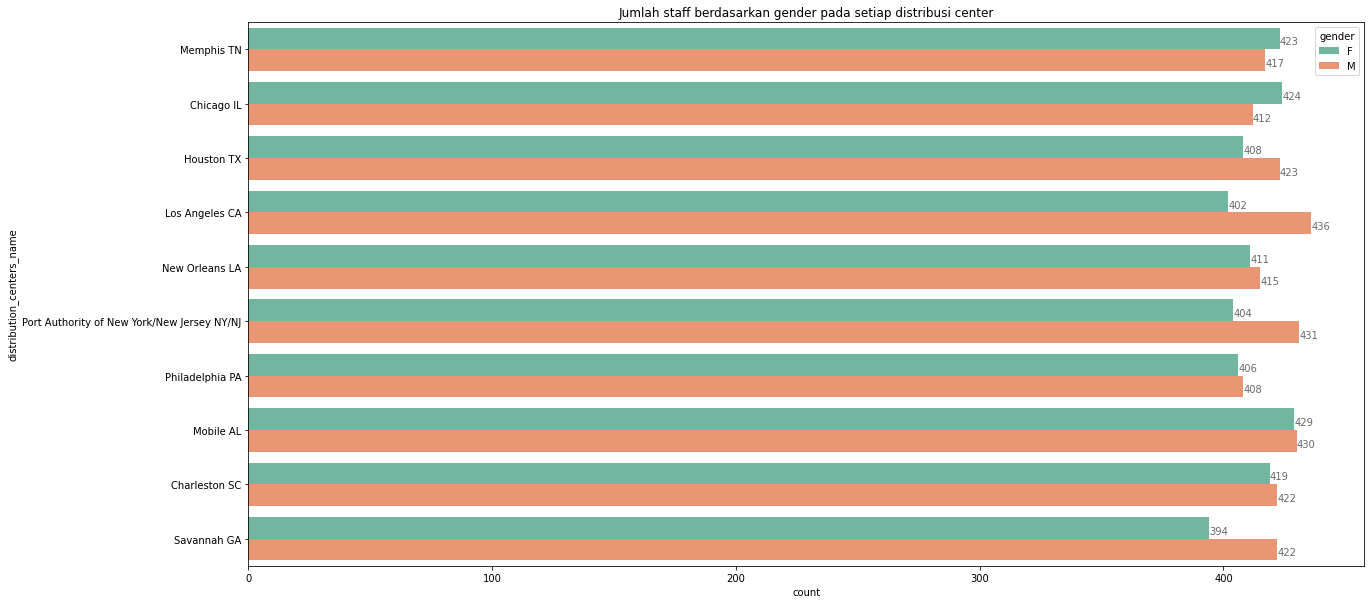

In [ ]:
#Jumlah staff berdasarkan gender pada setiap distribusi center
plt.figure(figsize = (20,10))
ax= sns.countplot(y=df_new['distribution_centers_name'], hue = df_new['gender'] , palette='Set2')
plt.title('Jumlah staff berdasarkan gender pada setiap distribusi center')
# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.1, i.get_y()+.31, \
            str(round((i.get_width()), 2)), fontsize=10, color='dimgrey')
plt.show()


- Pada setiap tempat distribusi rata-rata jumlah staff laki-laki lebih banyak dibandingkan perempuan. 
- pada tempat distribusi di los angeles jumlah laki-laki yang terbanyak yaitu 436 orang
- sedangkan jumlah perempuan yang terbanyak pada tempat distribusi mobile AL yaitu sebanyak 429 orang

### Kategori Lama Kerja

Pembagian Kategori Lama Kerja sebagai berikut 
* Kategori **'Baru'** = Berarti *Length Service (Lama Kerja)* **<=1 Tahun**
* Kategori **'Sedang'** = Berarti *Length Service (Lama Kerja)* **1-4 Tahun**
* Kategori **'Lama'** = Berarti *Length Service (Lama Kerja)* **>4 Tahun**

- Source : http://eprints.dinus.ac.id/22742/11/bab2_19723.pdf 


In [ ]:
df_new.loc[df_new['length_service']<=1, 'Kategori_lama_kerja'] = 'Baru'
df_new.loc[df_new['length_service'].between(1,4), 'Kategori_lama_kerja'] = 'Sedang'
df_new.loc[df_new['length_service']>4, 'Kategori_lama_kerja'] = 'Lama'

In [ ]:
df_new

,nama_lengkap,gender,age,length_service,absent_hour,distribution_centers_id,distribution_centers_name,latitude,longitude,jumlah_produk,Absen_rate,Kategori_lama_kerja
0,Abbate Laurie,F,39.891883,1.766600,51.527000,1,Memphis TN,35.1174,-89.9711,3891,2.477260,Sedang
1,Abbott Edward,M,54.248067,3.159911,131.783628,1,Memphis TN,35.1174,-89.9711,3891,6.335751,Sedang
2,Abbott George,M,38.109774,6.466156,0.000000,1,Memphis TN,35.1174,-89.9711,3891,0.000000,Lama
3,Abbott Monroe,M,62.250491,4.210838,163.868202,1,Memphis TN,35.1174,-89.9711,3891,7.878279,Lama
4,Adamek Adam,M,51.092510,0.503847,113.717929,1,Memphis TN,35.1174,-89.9711,3891,5.467208,Baru
...,...,...,...,...,...,...,...,...,...,...,...,...
8331,Young Dale,M,31.306072,4.114723,13.841373,10,Savannah GA,32.0167,-81.1167,1881,0.665451,Lama
8332,Young Judith,F,39.749116,4.391028,62.639122,10,Savannah GA,32.0167,-81.1167,1881,3.011496,Lama
8333,Zajicek Mary,F,42.287443,4.891073,72.706024,10,Savannah GA,32.0167,-81.1167,1881,3.495482,Lama
8334,Zamora Stanley,M,44.789064,7.108866,63.694934,10,Savannah GA,32.0167,-81.1167,1881,3.062256,Lama


In [ ]:
jlh_cat= df_new.groupby(['Kategori_lama_kerja'])[['nama_lengkap']].count().reset_index() 
jlh_cat.rename(columns={'nama_lengkap':'Jumlah Karyawan'})

,Kategori_lama_kerja,Jumlah Karyawan
0,Baru,68
1,Lama,5481
2,Sedang,2787


In [ ]:
jlh_cat_gen= df_new.groupby(['Kategori_lama_kerja','gender'])[['nama_lengkap']].count().reset_index() 
jlh_cat_gen.rename(columns={'nama_lengkap':'Jumlah Karyawan'})

,Kategori_lama_kerja,gender,Jumlah Karyawan
0,Baru,F,22
1,Baru,M,46
2,Lama,F,2720
3,Lama,M,2761
4,Sedang,F,1378
5,Sedang,M,1409


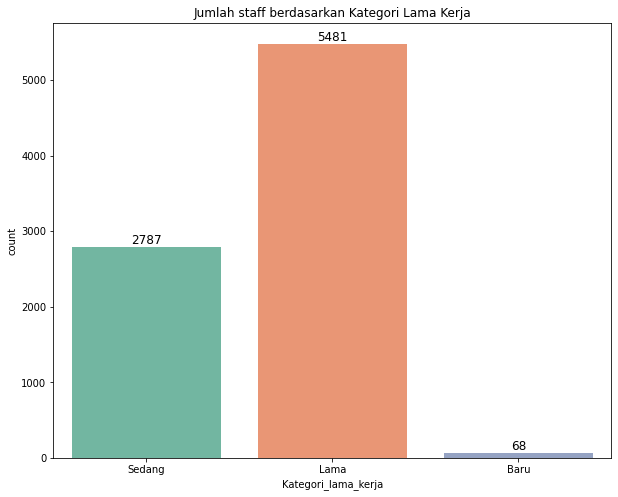

In [ ]:
#Jumlah staff berdasarkan gender pada setiap distribusi center
plt.figure(figsize = (10,8))
ax = sns.countplot(x = df_new['Kategori_lama_kerja'], palette='Set2')
plt.title('Jumlah staff berdasarkan Kategori Lama Kerja')
# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()


Berdasarkan visualisasi diatas maka dapat disimpulkan bahwa 


*   Staff dengan kategori kerja lama ( sudah bekerja > 4 Tahun ) **sebanyak 5481 Orang**
*   Staff dengan kategori kerja sedang ( sudah bekerja 1-4 Tahun ) **sebanyak 2787 Orang**
*   Staff dengan kategori kerja baru ( sudah bekerja 0-1 Tahun ) **sebanyak 68 Orang**





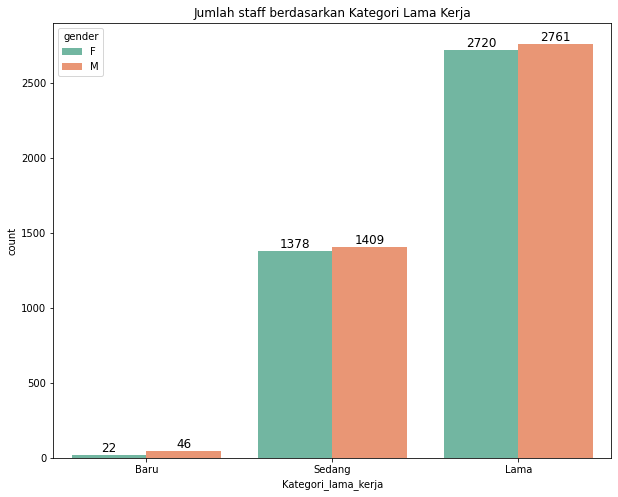

In [ ]:
#Jumlah staff berdasarkan gender pada setiap distribusi center
plt.figure(figsize = (10,8))
ax = sns.countplot(x = df_new['Kategori_lama_kerja'],hue=df_new['gender'], order = df_new['Kategori_lama_kerja'].value_counts(ascending=True).index,palette='Set2')
plt.title('Jumlah staff berdasarkan Kategori Lama Kerja')
# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()


Berdasarkan visualisasi diatas maka dapat disimpulkan bahwa 

*   Staff dengan kategori kerja baru ( *sudah bekerja 0-1 Tahun* ) **sebanyak 22 orang adalah perempuan dan 46 adalah laki-laki**
*   Staff dengan kategori kerja sedang ( *sudah bekerja 1-4 Tahun* ) **sebanyak 1378 adalah perempuan dan 1409 adalah laki-laki**
*   Staff dengan kategori kerja lama ( *sudah bekerja > 4 Tahun* ) **sebanyak 2720 adalah perempuan dan 2761 laki-laki**





In [ ]:
# memilih absent hour = 0 pada kategori kerja lama
baru = df_new[(df_new['Kategori_lama_kerja']=='Baru') & (df_new['absent_hour'] == 0)]
baru

,nama_lengkap,gender,age,length_service,absent_hour,distribution_centers_id,distribution_centers_name,latitude,longitude,jumlah_produk,Absen_rate,Kategori_lama_kerja
677,Serra Ronald,M,34.135488,0.665395,0.0,1,Memphis TN,35.1174,-89.9711,3891,0.0,Baru
697,Smith Bessie,F,32.480085,0.503847,0.0,1,Memphis TN,35.1174,-89.9711,3891,0.0,Baru
1556,Stange Sammy,M,31.636809,0.827182,0.0,2,Chicago IL,41.8369,-87.6847,3929,0.0,Baru
1809,Close Elisa,F,19.200836,0.998869,0.0,3,Houston TX,29.7604,-95.3698,3667,0.0,Baru
2527,Ashe Vincent,M,28.496866,0.786586,0.0,4,Los Angeles CA,34.0500,-118.2500,2761,0.0,Baru
2862,Hughes Jon,M,23.464216,0.503847,0.0,4,Los Angeles CA,34.0500,-118.2500,2761,0.0,Baru
2927,Kraft Albert,M,30.986143,0.744821,0.0,4,Los Angeles CA,34.0500,-118.2500,2761,0.0,Baru
4046,Stearns Gary,M,15.246456,0.527552,0.0,5,New Orleans LA,29.9500,-90.0667,2112,0.0,Baru
4181,Allen Michelle,F,31.166659,0.775518,0.0,6,Port Authority of New York/New Jersey NY/NJ,40.6340,-73.7834,2572,0.0,Baru
4816,Sanford Melvin,M,17.385454,0.503847,0.0,6,Port Authority of New York/New Jersey NY/NJ,40.6340,-73.7834,2572,0.0,Baru


In [ ]:
# memilih absent hour lebih dari 16 Jam pada kategori kerja lama
baru1 = df_new[(df_new['Kategori_lama_kerja']=='Baru') & (df_new['absent_hour'] > 16)]
baru.head()

,nama_lengkap,gender,age,length_service,absent_hour,distribution_centers_id,distribution_centers_name,latitude,longitude,jumlah_produk,Absen_rate,Kategori_lama_kerja
677,Serra Ronald,M,34.135488,0.665395,0.0,1,Memphis TN,35.1174,-89.9711,3891,0.0,Baru
697,Smith Bessie,F,32.480085,0.503847,0.0,1,Memphis TN,35.1174,-89.9711,3891,0.0,Baru
1556,Stange Sammy,M,31.636809,0.827182,0.0,2,Chicago IL,41.8369,-87.6847,3929,0.0,Baru
1809,Close Elisa,F,19.200836,0.998869,0.0,3,Houston TX,29.7604,-95.3698,3667,0.0,Baru
2527,Ashe Vincent,M,28.496866,0.786586,0.0,4,Los Angeles CA,34.0500,-118.2500,2761,0.0,Baru


In [ ]:
# memilih absent hour = 0 Jam pada kategori kerja sedang
sedang = df_new[(df_new['Kategori_lama_kerja']=='Sedang') & (df_new['absent_hour'] == 0)]
sedang.head()

,nama_lengkap,gender,age,length_service,absent_hour,distribution_centers_id,distribution_centers_name,latitude,longitude,jumlah_produk,Absen_rate,Kategori_lama_kerja
14,Alvarado Erica,F,28.222095,3.640241,0.0,1,Memphis TN,35.1174,-89.9711,3891,0.0,Sedang
17,Anderson Shirley,F,29.925957,2.242532,0.0,1,Memphis TN,35.1174,-89.9711,3891,0.0,Sedang
28,Avery Norman,M,19.762953,2.970642,0.0,1,Memphis TN,35.1174,-89.9711,3891,0.0,Sedang
52,Benjamin Rose,F,32.716904,1.273650,0.0,1,Memphis TN,35.1174,-89.9711,3891,0.0,Sedang
85,Buckley Nora,F,35.507548,1.905369,0.0,1,Memphis TN,35.1174,-89.9711,3891,0.0,Sedang


In [ ]:
# memilih absent hour > 16 Jam pada kategori kerja lama
sedang1 = df_new[(df_new['Kategori_lama_kerja']=='Sedang') & (df_new['absent_hour'] > 16)]
sedang1.head()

,nama_lengkap,gender,age,length_service,absent_hour,distribution_centers_id,distribution_centers_name,latitude,longitude,jumlah_produk,Absen_rate,Kategori_lama_kerja
0,Abbate Laurie,F,39.891883,1.766600,51.527000,1,Memphis TN,35.1174,-89.9711,3891,2.477260,Sedang
1,Abbott Edward,M,54.248067,3.159911,131.783628,1,Memphis TN,35.1174,-89.9711,3891,6.335751,Sedang
8,Adolph Roger,M,42.521306,3.979613,42.142369,1,Memphis TN,35.1174,-89.9711,3891,2.026075,Sedang
10,Aldridge Arlene,F,30.501292,3.563761,27.084924,1,Memphis TN,35.1174,-89.9711,3891,1.302160,Sedang
16,Anderson Shelia,F,40.116558,3.858773,49.498847,1,Memphis TN,35.1174,-89.9711,3891,2.379752,Sedang


In [ ]:
# memilih absent hour = 0 Jam pada kategori kerja lama
lama = df_new[(df_new['Kategori_lama_kerja']=='Lama') & (df_new['absent_hour'] == 0)]
lama.head()

,nama_lengkap,gender,age,length_service,absent_hour,distribution_centers_id,distribution_centers_name,latitude,longitude,jumlah_produk,Absen_rate,Kategori_lama_kerja
2,Abbott George,M,38.109774,6.466156,0.0,1,Memphis TN,35.1174,-89.9711,3891,0.0,Lama
6,Adams Gregory,M,32.124860,4.158934,0.0,1,Memphis TN,35.1174,-89.9711,3891,0.0,Lama
19,Apodaca Lisa,F,29.747177,6.232481,0.0,1,Memphis TN,35.1174,-89.9711,3891,0.0,Lama
22,Armstrong Kara,F,23.878542,4.689810,0.0,1,Memphis TN,35.1174,-89.9711,3891,0.0,Lama
26,Arroyo Barry,M,33.762834,4.358605,0.0,1,Memphis TN,35.1174,-89.9711,3891,0.0,Lama


In [ ]:
# memilih absent hour >16 Jam pada kategori kerja lama
lama1 = df_new[(df_new['Kategori_lama_kerja']=='Lama') & (df_new['absent_hour'] >=16)]
lama1.head()

,nama_lengkap,gender,age,length_service,absent_hour,distribution_centers_id,distribution_centers_name,latitude,longitude,jumlah_produk,Absen_rate,Kategori_lama_kerja
3,Abbott Monroe,M,62.250491,4.210838,163.868202,1,Memphis TN,35.1174,-89.9711,3891,7.878279,Lama
5,Adams Allegra,F,53.015900,5.742959,174.097109,1,Memphis TN,35.1174,-89.9711,3891,8.370053,Lama
9,Adorno Robert,M,30.617696,5.439550,16.819470,1,Memphis TN,35.1174,-89.9711,3891,0.808628,Lama
12,Alexander Sarah,F,53.889424,5.409041,111.673758,1,Memphis TN,35.1174,-89.9711,3891,5.368931,Lama
13,Allen Devon,M,49.400348,4.809701,106.200138,1,Memphis TN,35.1174,-89.9711,3891,5.105776,Lama


#### Membandingkan total staff yang absent = 0 jam pada tiap kategori lama kerja

In [ ]:
compare =df_new[df_new['absent_hour']==0]
compare.head()

,nama_lengkap,gender,age,length_service,absent_hour,distribution_centers_id,distribution_centers_name,latitude,longitude,jumlah_produk,Absen_rate,Kategori_lama_kerja
2,Abbott George,M,38.109774,6.466156,0.0,1,Memphis TN,35.1174,-89.9711,3891,0.0,Lama
6,Adams Gregory,M,32.124860,4.158934,0.0,1,Memphis TN,35.1174,-89.9711,3891,0.0,Lama
14,Alvarado Erica,F,28.222095,3.640241,0.0,1,Memphis TN,35.1174,-89.9711,3891,0.0,Sedang
17,Anderson Shirley,F,29.925957,2.242532,0.0,1,Memphis TN,35.1174,-89.9711,3891,0.0,Sedang
19,Apodaca Lisa,F,29.747177,6.232481,0.0,1,Memphis TN,35.1174,-89.9711,3891,0.0,Lama


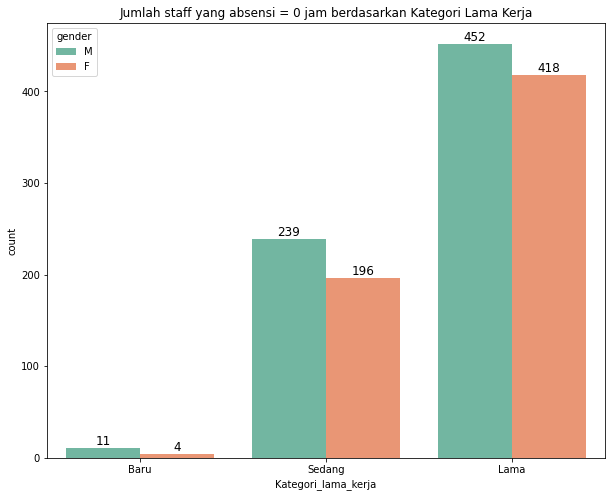

In [ ]:
#Menampilkan Jumlah staff yang absensi = 0 jam berdasarkan Kategori Lama Kerja
plt.figure(figsize = (10,8))
ax = sns.countplot(data = compare, x ='Kategori_lama_kerja',hue=compare['gender'], order = compare['Kategori_lama_kerja'].value_counts(ascending=True).index,palette='Set2')
plt.title('Jumlah staff yang absensi = 0 jam berdasarkan Kategori Lama Kerja')
# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()


* Staff dengan kategori kerja baru ( sudah bekerja 0-1 Tahun )  dengan Absent Hour (total jam absen/tahun) = 0 (tidak pernah absen) **sebanyak 11 Pria dan 4 Wanita**
* Staff dengan kategori kerja sedang ( sudah bekerja 1-4 Tahun )  dengan Absent Hour (total jam absen/tahun) = 0 (tidak pernah absen) **sebanyak 239 Pria dan 196 Wanita**
* Staff dengan kategori kerja lama ( sudah bekerja > 4 Tahun ) dengan Absent Hour (total jam absen/tahun) = 0 (tidak pernah absen) **sebanyak 452 Pria dan 418 Wanita**


####Membandingkan total staff yang absent > 16 jam pada tiap kategori lama kerja

In [ ]:
compare1 =df_new[df_new['absent_hour']>16]
compare1.head()

,nama_lengkap,gender,age,length_service,absent_hour,distribution_centers_id,distribution_centers_name,latitude,longitude,jumlah_produk,Absen_rate,Kategori_lama_kerja
0,Abbate Laurie,F,39.891883,1.766600,51.527000,1,Memphis TN,35.1174,-89.9711,3891,2.477260,Sedang
1,Abbott Edward,M,54.248067,3.159911,131.783628,1,Memphis TN,35.1174,-89.9711,3891,6.335751,Sedang
3,Abbott Monroe,M,62.250491,4.210838,163.868202,1,Memphis TN,35.1174,-89.9711,3891,7.878279,Lama
4,Adamek Adam,M,51.092510,0.503847,113.717929,1,Memphis TN,35.1174,-89.9711,3891,5.467208,Baru
5,Adams Allegra,F,53.015900,5.742959,174.097109,1,Memphis TN,35.1174,-89.9711,3891,8.370053,Lama


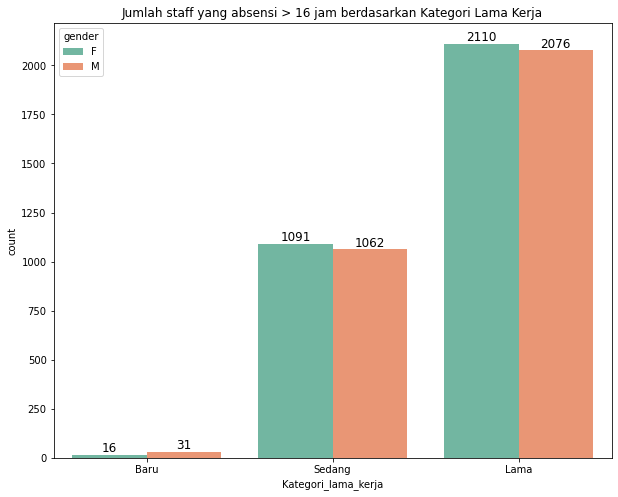

In [ ]:
#Menampilkan Jumlah staff yang absensi > 16 jam berdasarkan Kategori Lama Kerja
plt.figure(figsize = (10,8))
ax = sns.countplot(data = compare1, x ='Kategori_lama_kerja',hue=compare1['gender'], order = compare1['Kategori_lama_kerja'].value_counts(ascending=True).index,palette='Set2')
plt.title('Jumlah staff yang absensi > 16 jam berdasarkan Kategori Lama Kerja')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

* Staff dengan kategori kerja baru ( sudah bekerja 0-1 Tahun ) dengan Absent Hour (total jam absen/tahun) > 16 jam **sebanyak 16 Pria dan 31 Wanita**
* Staff dengan kategori kerja sedang ( sudah bekerja 1-4 Tahun ) dengan Absent Hour (total jam absen/tahun) > 16 jam **sebanyak 1091 Pria dan 1062 Wanita**
* Staff dengan kategori kerja lama ( sudah bekerja > 4 Tahun ) dengan Absent Hour (total jam absen/tahun) >16 jam **sebanyak 2110 Pria dan 2076 Wanita**

### Distribution Centers

In [ ]:
rata2_per_dis = df_new.groupby(['distribution_centers_name'])[['age','length_service','absent_hour','Absen_rate','latitude','longitude']].mean().reset_index() 

In [ ]:
rata2_per_dis

,distribution_centers_name,age,length_service,absent_hour,Absen_rate,latitude,longitude
0,Charleston SC,41.727011,4.672856,60.426914,2.905140,32.7833,-79.9333
1,Chicago IL,42.298647,4.647374,61.190412,2.941847,41.8369,-87.6847
2,Houston TX,41.492887,4.593761,58.433459,2.809301,29.7604,-95.3698
3,Los Angeles CA,41.500818,4.664838,58.066419,2.791655,34.0500,-118.2500
4,Memphis TN,42.748152,4.603493,65.933738,3.169891,35.1174,-89.9711
5,Mobile AL,41.684640,4.657351,61.672084,2.965004,30.6944,-88.0431
6,New Orleans LA,42.292633,4.604481,62.641123,3.011592,29.9500,-90.0667
7,Philadelphia PA,42.207047,4.633006,61.519165,2.957652,39.9500,-75.1667
8,Port Authority of New York/New Jersey NY/NJ,42.346885,4.674082,61.348799,2.949461,40.6340,-73.7834
9,Savannah GA,41.829809,4.570904,60.447284,2.906119,32.0167,-81.1167


In [ ]:
rata2_dis_gender = df_new.groupby(['distribution_centers_name','gender'])[['age','length_service','absent_hour','Absen_rate']].mean().reset_index() 

In [ ]:
rata2_dis_gender.head()

,distribution_centers_name,gender,age,length_service,absent_hour,Absen_rate
0,Charleston SC,F,41.203198,4.567838,65.645934,3.156055
1,Charleston SC,M,42.247101,4.777127,55.244995,2.656009
2,Chicago IL,F,41.488902,4.551770,66.193707,3.182390
3,Chicago IL,M,43.131977,4.745761,56.041391,2.694298
4,Houston TX,F,40.682691,4.563190,62.321135,2.996208


In [ ]:
jlh_kar= df_new.groupby(['distribution_centers_id','distribution_centers_name'])['nama_lengkap'].count().reset_index() 
jlh_kar.rename(columns={'nama_lengkap':'Jumlah Karyawan'},inplace=True)

In [ ]:
rata2_prod= pd.merge(jlh_kar, df_new, on='distribution_centers_id', how='inner')

In [ ]:
jlh_prod= rata2_prod.groupby(['distribution_centers_name_x','Jumlah Karyawan'])[['age','length_service','absent_hour','Absen_rate','jumlah_produk']].mean().reset_index() 
jlh_prod.rename(columns={'distribution_centers_name_x':'distribution_centers_name'},inplace=True)
jlh_prod

,distribution_centers_name,Jumlah Karyawan,age,length_service,absent_hour,Absen_rate,jumlah_produk
0,Charleston SC,841,41.727011,4.672856,60.426914,2.905140,2719.0
1,Chicago IL,836,42.298647,4.647374,61.190412,2.941847,3929.0
2,Houston TX,831,41.492887,4.593761,58.433459,2.809301,3667.0
3,Los Angeles CA,838,41.500818,4.664838,58.066419,2.791655,2761.0
4,Memphis TN,840,42.748152,4.603493,65.933738,3.169891,3891.0
5,Mobile AL,859,41.684640,4.657351,61.672084,2.965004,2919.0
6,New Orleans LA,826,42.292633,4.604481,62.641123,3.011592,2112.0
7,Philadelphia PA,814,42.207047,4.633006,61.519165,2.957652,2669.0
8,Port Authority of New York/New Jersey NY/NJ,835,42.346885,4.674082,61.348799,2.949461,2572.0
9,Savannah GA,816,41.829809,4.570904,60.447284,2.906119,1881.0


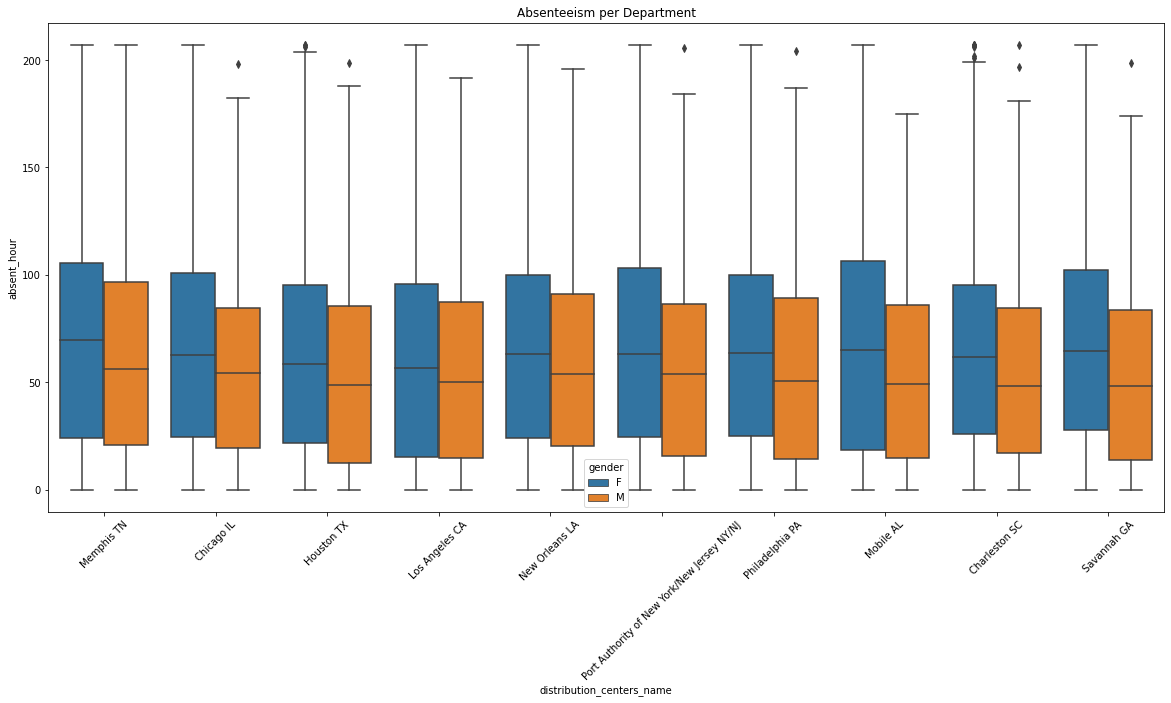

In [ ]:
plt.figure(figsize=(20, 9))
sns.boxplot("distribution_centers_name", "absent_hour", hue="gender", data=df_new)
plt.xticks(rotation = 45)
plt.title('Absenteeism per Department');

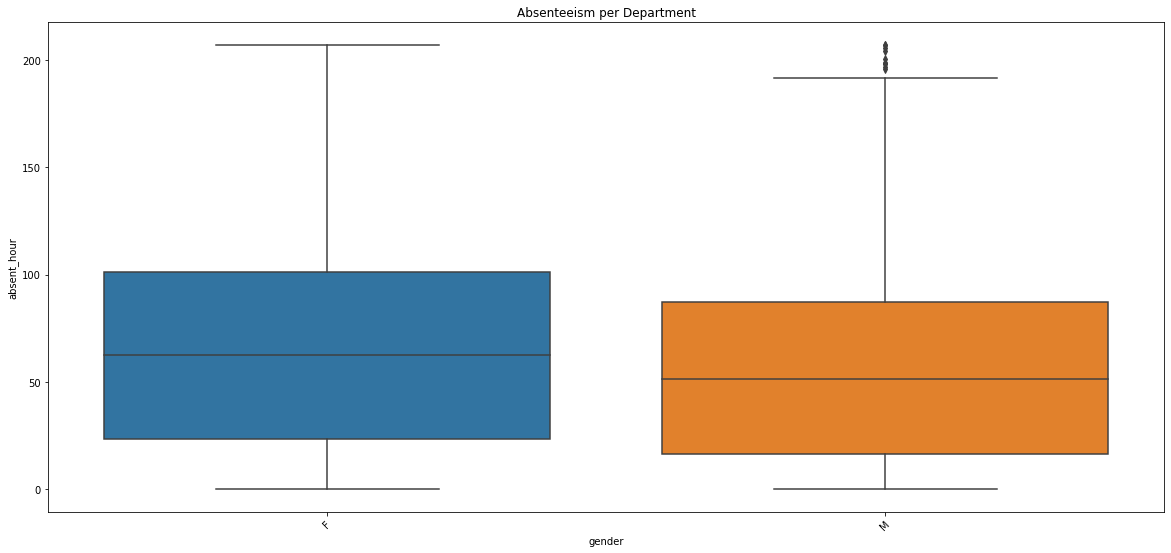

In [ ]:
plt.figure(figsize=(20, 9))
sns.boxplot("gender", "absent_hour", data=df_new)
plt.xticks(rotation = 45)
plt.title('Absenteeism per Department');

In [ ]:
df_new[df_new['absent_hour']==0].head()

,nama_lengkap,gender,age,length_service,absent_hour,distribution_centers_id,distribution_centers_name,latitude,longitude,jumlah_produk,Absen_rate,Kategori_lama_kerja
2,Abbott George,M,38.109774,6.466156,0.0,1,Memphis TN,35.1174,-89.9711,3891,0.0,Lama
6,Adams Gregory,M,32.124860,4.158934,0.0,1,Memphis TN,35.1174,-89.9711,3891,0.0,Lama
14,Alvarado Erica,F,28.222095,3.640241,0.0,1,Memphis TN,35.1174,-89.9711,3891,0.0,Sedang
17,Anderson Shirley,F,29.925957,2.242532,0.0,1,Memphis TN,35.1174,-89.9711,3891,0.0,Sedang
19,Apodaca Lisa,F,29.747177,6.232481,0.0,1,Memphis TN,35.1174,-89.9711,3891,0.0,Lama


In [ ]:
df_new[df_new['absent_hour']==0].count()

nama_lengkap                 1320
gender                       1320
age                          1320
length_service               1320
absent_hour                  1320
distribution_centers_id      1320
distribution_centers_name    1320
latitude                     1320
longitude                    1320
jumlah_produk                1320
Absen_rate                   1320
Kategori_lama_kerja          1320
dtype: int64

In [ ]:
df_new[df_new['absent_hour']>16].head(5)

,nama_lengkap,gender,age,length_service,absent_hour,distribution_centers_id,distribution_centers_name,latitude,longitude,jumlah_produk,Absen_rate,Kategori_lama_kerja
0,Abbate Laurie,F,39.891883,1.766600,51.527000,1,Memphis TN,35.1174,-89.9711,3891,2.477260,Sedang
1,Abbott Edward,M,54.248067,3.159911,131.783628,1,Memphis TN,35.1174,-89.9711,3891,6.335751,Sedang
3,Abbott Monroe,M,62.250491,4.210838,163.868202,1,Memphis TN,35.1174,-89.9711,3891,7.878279,Lama
4,Adamek Adam,M,51.092510,0.503847,113.717929,1,Memphis TN,35.1174,-89.9711,3891,5.467208,Baru
5,Adams Allegra,F,53.015900,5.742959,174.097109,1,Memphis TN,35.1174,-89.9711,3891,8.370053,Lama


In [ ]:
df_new[df_new['absent_hour']>16].count()

nama_lengkap                 6386
gender                       6386
age                          6386
length_service               6386
absent_hour                  6386
distribution_centers_id      6386
distribution_centers_name    6386
latitude                     6386
longitude                    6386
jumlah_produk                6386
Absen_rate                   6386
Kategori_lama_kerja          6386
dtype: int64

###Korelasi

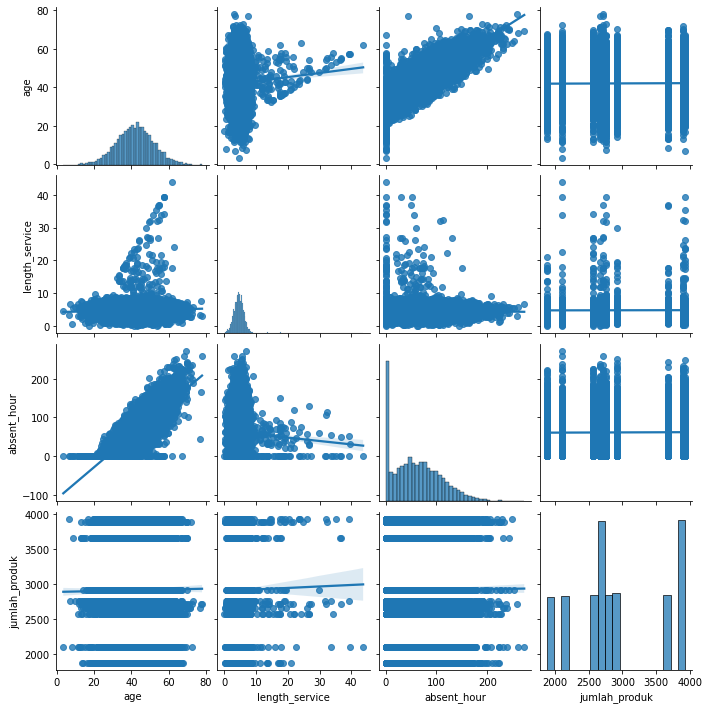

In [ ]:
# with regression
sns.pairplot(df[['gender','age','length_service','absent_hour','distribution_centers_name','jumlah_produk']], kind="reg")
plt.show()

- Absen Hour dan Age memiliki korelasi yang kuat yaitu korelasi positif 

(0.0, 219.8911097204714)

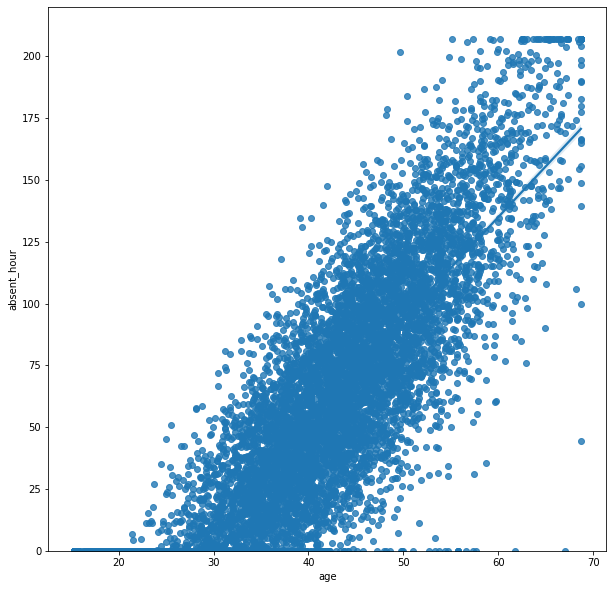

In [ ]:
#visualisasi terhadap data untuk melihat hubungan antara dua variabel
fig, ax = plt.subplots(figsize=(10,10))
sns.regplot(data=df_new, x="age", y="absent_hour")
plt.ylim(0,)

- dapat dilihat bawha korelasi antara kedua kolom tersebut sangat kuat

(0.0, 217.3713616725)

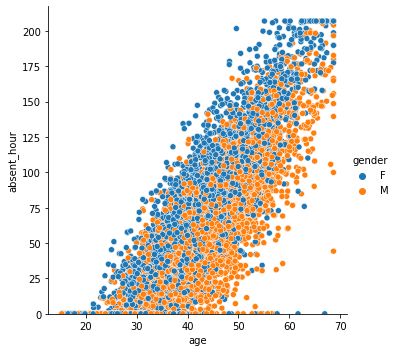

In [ ]:
#visualisasi terhadap data untuk melihat hubungan antara dua variabel
sns.relplot(x="age", y="absent_hour", data=df_new, kind="scatter",hue="gender")
plt.ylim(0,)

(0.0, 217.3713616725)

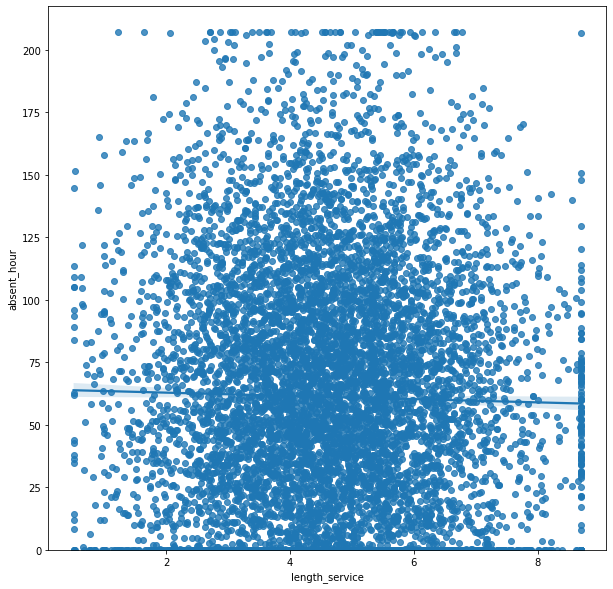

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.regplot(data=df_new, x="length_service", y="absent_hour")
plt.ylim(0,)

- tidak ada korelasi antara length_service dan absen hour

(0.0, 217.3713616725)

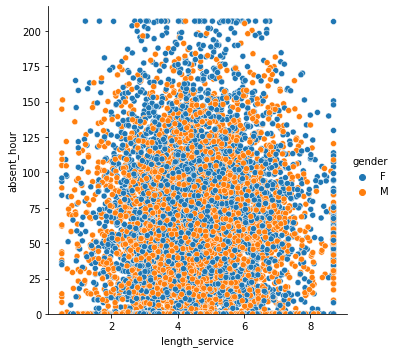

In [ ]:
sns.relplot(x="length_service", y="absent_hour", data=df_new, kind="scatter",hue="gender")
plt.ylim(0,)

In [ ]:
df_new

,nama_lengkap,gender,age,length_service,absent_hour,distribution_centers_id,distribution_centers_name,latitude,longitude,jumlah_produk,Absen_rate,Kategori_lama_kerja
0,Abbate Laurie,F,39.891883,1.766600,51.527000,1,Memphis TN,35.1174,-89.9711,3891,2.477260,Sedang
1,Abbott Edward,M,54.248067,3.159911,131.783628,1,Memphis TN,35.1174,-89.9711,3891,6.335751,Sedang
2,Abbott George,M,38.109774,6.466156,0.000000,1,Memphis TN,35.1174,-89.9711,3891,0.000000,Lama
3,Abbott Monroe,M,62.250491,4.210838,163.868202,1,Memphis TN,35.1174,-89.9711,3891,7.878279,Lama
4,Adamek Adam,M,51.092510,0.503847,113.717929,1,Memphis TN,35.1174,-89.9711,3891,5.467208,Baru
...,...,...,...,...,...,...,...,...,...,...,...,...
8331,Young Dale,M,31.306072,4.114723,13.841373,10,Savannah GA,32.0167,-81.1167,1881,0.665451,Lama
8332,Young Judith,F,39.749116,4.391028,62.639122,10,Savannah GA,32.0167,-81.1167,1881,3.011496,Lama
8333,Zajicek Mary,F,42.287443,4.891073,72.706024,10,Savannah GA,32.0167,-81.1167,1881,3.495482,Lama
8334,Zamora Stanley,M,44.789064,7.108866,63.694934,10,Savannah GA,32.0167,-81.1167,1881,3.062256,Lama


In [ ]:
#drop kolom yang tidak penting
df_corr = df.drop(['distribution_centers_id', 'latitude','longitude'],axis=1)

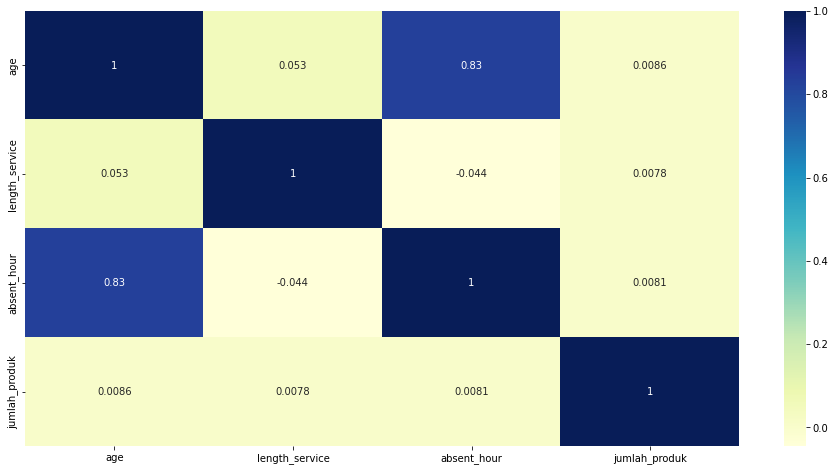

In [ ]:
# MAPPING corr antar semua variabel/kolom
plt.figure(figsize = (16,8) )

sns.heatmap(df_corr.corr(), annot =True,cmap="YlGnBu")

* Dapat dilihat korelasi antara age dan absent_hour sangat kuat (korelasi positif) yaitu 0.83
* sedangkan korelasi antara length_service dan absent_hour bernilai negatif yaitu -0.044

## Formatting,Transforming, and Splitting Data

* Variabel Dependent ('absent_hour')
* Variabel Independent ('gender','age','length_service','Kategori_lama_kerja')

In [ ]:
# # label encoding
# # untuk kolom jenis_kelamin dan pendidikan
# mapping_jenis_kelamin = {
#      'F' : 0,
#      'M' : 1
#  }
# df_new['gender'] = df_new['gender'].map(mapping_jenis_kelamin)

In [ ]:
#Create Target
#Target kita adalah ingin mengurangi jam absensi staff maksimal 16 jam/tahun, 
#staff yang tidak hadir lebih dari 16 jam dianggap berlebihan (1) 
# staff yang tidak hadir < 16 jam dianggap normal (0)

targets = np.where(df_new['absent_hour'] >=16, 1, 0)

In [ ]:
targets

array([1, 1, 0, ..., 1, 1, 1])

In [ ]:
df_new['absent_hour'] = targets

In [ ]:
df_new[['absent_hour']].head(10)

,absent_hour
0,1
1,1
2,0
3,1
4,1
5,1
6,0
7,0
8,1
9,1


In [ ]:
df_new.head(5)

,nama_lengkap,gender,age,length_service,absent_hour,distribution_centers_id,distribution_centers_name,latitude,longitude,jumlah_produk,Absen_rate,Kategori_lama_kerja
0,Abbate Laurie,F,39.891883,1.766600,1,1,Memphis TN,35.1174,-89.9711,3891,2.477260,Sedang
1,Abbott Edward,M,54.248067,3.159911,1,1,Memphis TN,35.1174,-89.9711,3891,6.335751,Sedang
2,Abbott George,M,38.109774,6.466156,0,1,Memphis TN,35.1174,-89.9711,3891,0.000000,Lama
3,Abbott Monroe,M,62.250491,4.210838,1,1,Memphis TN,35.1174,-89.9711,3891,7.878279,Lama
4,Adamek Adam,M,51.092510,0.503847,1,1,Memphis TN,35.1174,-89.9711,3891,5.467208,Baru


In [ ]:
features=df_new[['gender','age','length_service']] 
features

,gender,age,length_service
0,F,39.891883,1.766600
1,M,54.248067,3.159911
2,M,38.109774,6.466156
3,M,62.250491,4.210838
4,M,51.092510,0.503847
...,...,...,...
8331,M,31.306072,4.114723
8332,F,39.749116,4.391028
8333,F,42.287443,4.891073
8334,M,44.789064,7.108866


In [ ]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler

- Melakukan transform data jenis kelamin (categorical) menjadi numerical dengan menggunakan onehotencoder
- selanjutnya dilakukan standarisasi untuk semua nilai numerical

In [ ]:
encoder = OneHotEncoder()
encoder.fit(features.select_dtypes(include="object"))
X_onehot = pd.DataFrame(encoder.transform(features.select_dtypes(include="object")).toarray(),columns=encoder.get_feature_names_out())

X_preprocessed = pd.concat([features.select_dtypes(exclude="object"), X_onehot],axis=1)
X_preprocessed

,age,length_service,gender_F,gender_M
0,39.891883,1.766600,1.0,0.0
1,54.248067,3.159911,0.0,1.0
2,38.109774,6.466156,0.0,1.0
3,62.250491,4.210838,0.0,1.0
4,51.092510,0.503847,0.0,1.0
...,...,...,...,...
8331,31.306072,4.114723,0.0,1.0
8332,39.749116,4.391028,1.0,0.0
8333,42.287443,4.891073,1.0,0.0
8334,44.789064,7.108866,0.0,1.0


In [ ]:
scaler = StandardScaler()
scaler.fit(X_preprocessed)
X= pd.DataFrame(scaler.transform(X_preprocessed),columns=X_preprocessed.columns)

X.head()

,age,length_service,gender_F,gender_M
0,-0.214589,-1.838671,1.011583,-1.011583
1,1.238571,-0.944767,-0.988549,0.988549
2,-0.394977,1.176418,-0.988549,0.988549
3,2.048591,-0.270524,-0.988549,0.988549
4,0.919160,-2.648814,-0.988549,0.988549


In [ ]:
# #melakukan standardisasi semua fitur numerik yang sudah terbentuk
# scaler = StandardScaler()
# scaler.fit(features)
# X = pd.DataFrame(scaler.transform(features),columns=features.columns)

# X.head()

In [ ]:
#target
y = df_new['absent_hour']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10)

#perbandingan train:testing adalah 90:10
print("number of test samples:", X_test.shape[0])
print("number of training samples:",X_train.shape[0])

number of test samples: 834
number of training samples: 7502


# Modeling

## Model Development and Prediction

In [ ]:
from sklearn.linear_model import LogisticRegression
#Define Model
classifier = LogisticRegression(random_state = 0)
#Fit the Model
classifier.fit(X_train, y_train)


LogisticRegression(random_state=0)

In [ ]:
# assess the train accuracy of the model
classifier.score(X_train,y_train)

0.8840309250866436

In [ ]:
classifier.score(X_test,y_test)

0.8657074340527577

In [ ]:
#Predict
# find the model outputs according to our model
model_outputs = classifier.predict(X_test)
df1= pd.DataFrame(data=model_outputs)
df1.head(10)

,0
0,1
1,1
2,1
3,0
4,1
5,0
6,1
7,1
8,1
9,1


In [ ]:
# compare them with the targets
y_train

2740    1
1384    1
1388    1
7591    1
1736    1
       ..
6059    1
4252    1
5531    1
3678    1
4167    1
Name: absent_hour, Length: 7502, dtype: int64

In [ ]:
# ACTUALLY compare the two variables
model_outputs == y_test

5352     True
5012     True
2208     True
6702    False
2264     True
        ...  
3863     True
8226     True
4275    False
2863     True
1110     True
Name: absent_hour, Length: 834, dtype: bool

In [ ]:
# find out in how many instances we predicted correctly
np.sum((model_outputs==y_test))

722

In [ ]:
# get the total number of instances
model_outputs.shape[0]

834

In [ ]:
# calculate the accuracy of the model
np.sum((model_outputs==y_test)) / model_outputs.shape[0]

0.8657074340527577

In [ ]:
#Finding the intercept and coefficients
# get the intercept (bias) of our model
classifier.intercept_

array([2.61027441])

In [ ]:
# get the coefficients (weights) of our model
classifier.coef_

array([[ 3.11595063, -0.12314341,  0.21926996, -0.21926996]])

In [ ]:
# check what were the names of our columns
X.columns.values

array(['age', 'length_service', 'gender_F', 'gender_M'], dtype=object)

In [ ]:
# save the names of the columns in an ad-hoc variable
feature_name = X.columns.values

In [ ]:
# use the coefficients from this table (they will be exported later and will be used in Tableau)
# transpose the model coefficients (model.coef_) and throws them into a df (a vertical organization, so that they can be
# multiplied by certain matrices later) 
summary_table = pd.DataFrame (columns=['Feature name'], data = feature_name)

# add the coefficient values to the summary table
summary_table['Coefficient'] = np.transpose(classifier.coef_)

# display the summary table
summary_table

,Feature name,Coefficient
0,age,3.115951
1,length_service,-0.123143
2,gender_F,0.219270
3,gender_M,-0.219270


In [ ]:
# do a little Python trick to move the intercept to the top of the summary table
# move all indices by 1
summary_table.index = summary_table.index + 1

# add the intercept at index 0
summary_table.loc[0] = ['Intercept', classifier.intercept_[0]]

# sort the df by index
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficient
0,Intercept,2.610274
1,age,3.115951
2,length_service,-0.123143
3,gender_F,0.219270
4,gender_M,-0.219270


In [ ]:
#interpretting the coefficiens
# create a new Series called: 'Odds ratio' which will show the.. odds ratio of each feature
summary_table['Odds_ratio'] = np.exp(summary_table.Coefficient)


In [ ]:
# sort the table according to odds ratio
# note that by default, the sort_values method sorts values by 'ascending'
summary_table.sort_values('Odds_ratio', ascending=False)

,Feature name,Coefficient,Odds_ratio
1,age,3.115951,22.554861
0,Intercept,2.610274,13.602783
3,gender_F,0.219270,1.245167
2,length_service,-0.123143,0.884137
4,gender_M,-0.219270,0.803105


- Antilog
- e^coef = odds_ratio

 **Interpretasi** :
- Intercept :  Ketika variabel X = 0: Peluang staff memiliki absent_hours >16 jam  sebesar 13.388877 kali peluang gagal.
- Staff yang memiliki umur yang tergolong tua berpeluang memiliki jam absen yang lebih tinggi (>16 jam)  sebesar 22.819741 kali lebih mungkin dibandingkan staff dengan usia yang tergolong muda
- Staff yang berjenis kelamin Perempuan (gender_F) berpeluang memiliki jam absensi yang tinggi (>16 jam) sebesar 1.253205 kali lebih mungkin dibandingakn staff yang bukan perempuan
- Staff yang berjenis kelamin Laki-laki (gender_M) berpeluang memiliki jam absensi yang tinggi (>16 jam) sebesar 0.797954 kali lebih mungkin dibandingakn staff yang bukan perempuan
- Staff yang memiliki length_service lama berpeluang memiliki jam absen yang lebih tinggi (>16 jam) sebesar 0.888562 kali lebih mungkin dibandingan staff yang tidak memiliki length_service yang lama


In [ ]:
#Testing The Model
# assess the test accuracy of the model
classifier.score(X_test,y_test)

0.8657074340527577

In [ ]:
# find the predicted probabilities of each class
# the first column shows the probability of a particular observation to be 0, while the second one - to be 1

predicted_probability = classifier.predict_proba(X_test)
# let's check that out
predicted_probability

array([[2.37432127e-02, 9.76256787e-01],
       [8.31341846e-05, 9.99916866e-01],
       [2.68253082e-01, 7.31746918e-01],
       ...,
       [4.85568919e-01, 5.14431081e-01],
       [6.97930173e-02, 9.30206983e-01],
       [9.42449780e-02, 9.05755022e-01]])

In [ ]:
predicted_probability.shape

(834, 2)

In [ ]:
# select ONLY the probabilities referring to (1) not (0)
predicted_probability[:,1]

array([0.97625679, 0.99991687, 0.73174692, 0.43365552, 0.7424387 ,
       0.38371578, 0.99994224, 0.74336237, 0.71167366, 0.56806227,
       0.9522592 , 0.02060421, 0.99150782, 0.89883794, 0.00239032,
       0.65353675, 0.99996951, 0.61989471, 0.72321445, 0.36287595,
       0.99903927, 0.99570817, 0.77992688, 0.96634982, 0.70120666,
       0.05604177, 0.99667407, 0.41224432, 0.91005148, 0.31609419,
       0.98690573, 0.6054291 , 0.98886938, 0.00176589, 0.89585938,
       0.92571908, 0.95473402, 0.99951964, 0.02643377, 0.92018617,
       0.93953967, 0.99823274, 0.98042561, 0.50711924, 0.9655727 ,
       0.45696124, 0.01573693, 0.50376142, 0.33021053, 0.99680736,
       0.98469151, 0.99685561, 0.54068783, 0.58783805, 0.99979869,
       0.00454094, 0.99543237, 0.71779312, 0.33101093, 0.98242242,
       0.30674794, 0.87555849, 0.77976428, 0.99981596, 0.06008677,
       0.90827662, 0.99992206, 0.9902775 , 0.8348617 , 0.99642874,
       0.87573934, 0.99408636, 0.06927985, 0.85940986, 0.99776

In [ ]:
df1= pd.DataFrame(data=predicted_probability[:,1])
df1.head(10)

,0
0,0.976257
1,0.999917
2,0.731747
3,0.433656
4,0.742439
5,0.383716
6,0.999942
7,0.743362
8,0.711674
9,0.568062


In [ ]:
X_preprocessed.head(5)

,age,length_service,gender_F,gender_M
0,39.891883,1.766600,1.0,0.0
1,54.248067,3.159911,0.0,1.0
2,38.109774,6.466156,0.0,1.0
3,62.250491,4.210838,0.0,1.0
4,51.092510,0.503847,0.0,1.0


- Coba untuk melakukan predict (probabilitas) untuk datasetnya

In [ ]:
X_preprocessed['Probability']= classifier.predict_proba(X)[:,1]

In [ ]:
X_preprocessed['Prediction'] = classifier.predict(X)

In [ ]:
X_preprocessed['Actual'] = y

In [ ]:
X_preprocessed.head(10)

,age,length_service,gender_F,gender_M,Probability,Prediction,Actual
0,39.891883,1.766600,1.0,0.0,0.931609,1,1
1,54.248067,3.159911,0.0,1.0,0.997876,1,1
2,38.109774,6.466156,0.0,1.0,0.690222,1,0
3,62.250491,4.210838,0.0,1.0,0.999815,1,1
4,51.092510,0.503847,0.0,1.0,0.995354,1,1
5,53.015900,5.742959,1.0,0.0,0.998401,1,1
6,32.124860,4.158934,0.0,1.0,0.288185,0,0
7,36.366910,2.218496,0.0,1.0,0.642686,1,0
8,42.521306,3.979613,0.0,1.0,0.915986,1,1
9,30.617696,5.439550,0.0,1.0,0.185314,0,1


- Dengan 10 data tersebut, dapat dilihat probabilitas untuk staff yang memiliki absent_hour > 16 jam (1) serta hasil prediksi model dan nilai aktualnya

In [ ]:
X_train

,age,length_service,gender_F,gender_M
2740,0.317654,0.062094,-0.988549,0.988549
1384,0.401140,0.119785,1.011583,-1.011583
1388,0.685451,-1.103246,-0.988549,0.988549
7591,-0.731319,0.873525,1.011583,-1.011583
1736,-0.824683,2.047642,1.011583,-1.011583
...,...,...,...,...
6059,-0.442475,-0.101567,1.011583,-1.011583
4252,0.356369,-0.237167,1.011583,-1.011583
5531,2.703370,-1.192893,-0.988549,0.988549
3678,-0.485964,0.005593,-0.988549,0.988549


In [ ]:
import statsmodels.api as sm
# building the model and fitting the data
log_reg = sm.Logit(y_train, X_train).fit()
# printing the summary table
print(log_reg.summary())

         Current function value: 0.523283
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:            absent_hour   No. Observations:                 7502
Model:                          Logit   Df Residuals:                     7499
Method:                           MLE   Df Model:                            2
Date:                Wed, 22 Jun 2022   Pseudo R-squ.:                 0.03497
Time:                        00:03:38   Log-Likelihood:                -3925.7
converged:                      False   LL-Null:                       -4067.9
Covariance Type:            nonrobust   LLR p-value:                 1.653e-62
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
age                1.5268      0.038     39.864      0.000       1.452       1.602
length_service    -0.0558      0.027     -2.029      

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


- P-Value pada variabel age sebesar 0.000. karena p-value < a = 0.05 Maka, dapat disimpulkan bahwa **variabel  age berpengaruh terhadap variabel absent_hour**
- P-Value pada variable length_service sebesar 0.027. karena p-value< a = 0.05 Maka dapat disimpulkan bawah **variabel length_service berpengaruh terhadap variabel absent hour**
- P-Value pada variable gender sebesar 1.000. karena p-value > a =0.05 Maka dapat disimpulkan bahwa **variable gender tidak berpengaruh terhadap varaible absent_hour**

##Evaluation Metrics

### Confusion Matrix

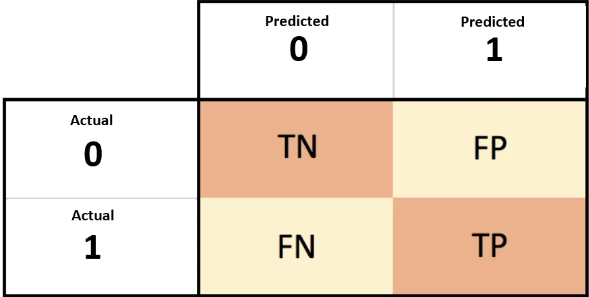

| Representasi      | Penjelasan                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| TP (True Positive)            |Jumlah Nilai True diklasifikasikan dengan akurat                                                                     |
| TN (True Negative)        | Jumlah Nilai False diklasifikasikan secara akurat                                                                           |
| FP (False Positive)        | Jumlah Nilai False diklasifikasikan sebagai True                                             |
| FN (False Negative)      | Jumlah Nilai True diklasifikasikan sebagai False                                                                                |

In [ ]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[135,  71],
       [ 41, 587]])

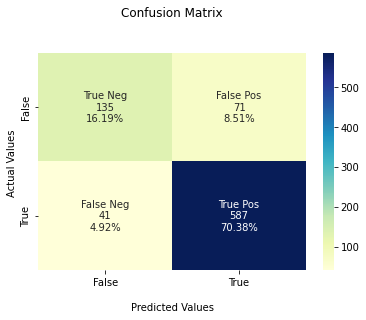

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap="YlGnBu")

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

***Representasi Confusion Matrix***

*Absent berlebihan = True (1)*

- **TRUE POSITIF** = Memprediksi Staff yang absent berlebihan (>16 jam) dengan benar **sebanyak 586**

- **TRUE NEGATIF** = Memprediksi Staff yang absent tidak berlebihan (<16 jam) dengan benar **sebanyak 150**

- **FALSE POSITIF** = Memprediksi dengan salah bahwa data staff yang seharusnya absent <16 jam diprediksi absent > 16 jam **sebanyak 55**

- **FALSE NEGATIF** = Memprediksi dengan salah bahwa data staff yang seharusnya absent > 16 jam diprediksi <16 jam **sebanyak 43**

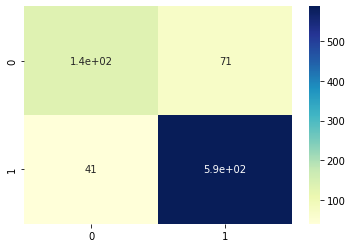

In [ ]:
#Memastikan posisi TP,TN,FP,FN
# 0 = False
# 1 = True
sns.heatmap(cm, annot=True, cmap="YlGnBu")

### Accuracy

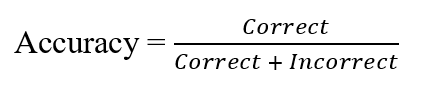

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.8657074340527577

### Precission, Recall, F1-Score

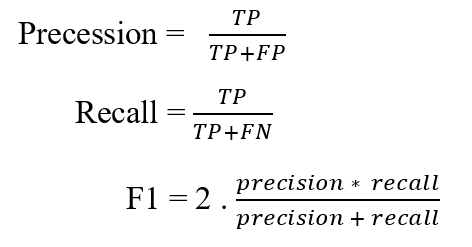

* Precision: determines the accuracy of positive predictions.
* Recall: determines the fraction of positives that were correctly identified.

* F1 Score: is a weighted harmonic mean of precision and recall with the best score of 1 and the worst score of 0. F1 score conveys the balance between the precision and the recall.

* Referensi : https://onezero.blog/modelling-binary-logistic-regression-using-python-research-oriented-modelling-and-interpretation/ 

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.66      0.71       206
           1       0.89      0.93      0.91       628

    accuracy                           0.87       834
   macro avg       0.83      0.80      0.81       834
weighted avg       0.86      0.87      0.86       834



In [ ]:
from sklearn.metrics import precision_score

precision_score(y_test,y_pred)

0.89209726443769

In [ ]:
from sklearn.metrics import recall_score

recall_score(y_test,y_pred)

0.9347133757961783

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_test,y_pred)

0.9129082426127527

### ROC Curve

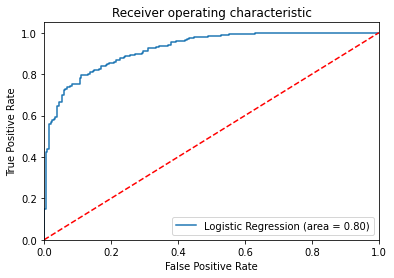

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

- Kurva ROC cenderung keatas dan berada di area True Positif. hal ini mengambbarkan bawah daerah trus positif sangat dominan pada model kita

#Author 😀


About  | Des 
-------------------|------------------
**Nama**    | *Richardo Zefanya Damarjanan*
**CAMP ID**      | *DBA2215795*
**University**     | *Universitas 17 Agustus 1945 Surabaya* 
**Email**      | richarddamarjanan@gmail.com
**Linkedin**    | https://www.linkedin.com/in/richardo-damarjanan/
**Github**     | https://github.com/richardzefan

**=============PROGRAM MSIB (STUDI INDEPENDEN BATCH 2 TAHUN 2022) KAMPUS MERDEKA============================**
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

**================ DATA,BUSINESS ANALYTICS AND OPERATIONS BY RUANGGURU=======================================**